In [162]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [163]:
folder_path = "data/robustShapeMean2D.mat"


def load_data(folder_path):

	mat_data = loadmat(folder_path)
	return mat_data['pointsets']

data = load_data(folder_path)

In [164]:
def plot_shape(shape):
    plt.scatter(shape[:, 0], shape[:, 1])

In [165]:
def pre_shape(pts):
    pts_mean = np.mean(pts, axis=0)
    pts = pts - pts_mean
    
    norm = np.linalg.norm(pts)
    if norm > 0:
        pts = pts / norm
    
    return pts


In [166]:
import numpy as np

def find_transform(sets, mean):
	"""
	Aligns each point set in `sets` to the reference set `ref` using similarity transforms
	(rotation, scale, translation), and returns the aligned versions.

	Args:
		sets (list of np.ndarray): List of point sets to align (each shape: [N, D]).
		ref (np.ndarray): Reference point set to align to (shape: [N, D]).

	Returns:
		z_all (list of np.ndarray): List of aligned point sets.
	"""

	mean_ctr = pre_shape(mean)
	s_all = []   
	R_all = []   
	t_all = []   
	z_all = []   

	for pts in sets:
		
		pts_ctr = pre_shape(pts)
		U, S, Vt = np.linalg.svd(pts_ctr.T @ mean_ctr)
		V = Vt.T
		det = np.sign(np.linalg.det(V @ U.T))

		Ip = np.eye(U.shape[0])
		Ip[-1, -1] = det

		R = V @ Ip @ U.T

		z = (R @ pts_ctr.T).T  # shape: (N, D)

		z_all.append(z)

	return z_all


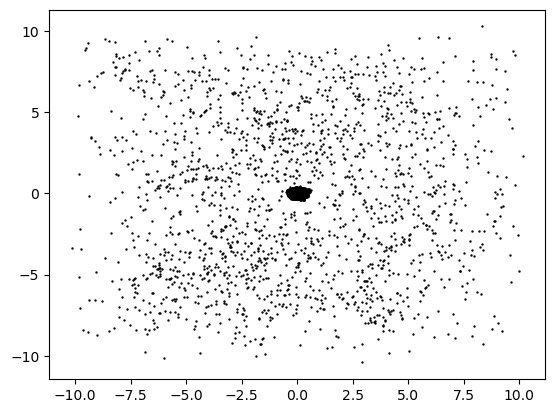

In [170]:
for pts in data:
	plt.scatter(pts[:, 0], pts[:, 1], color='black', s=0.5)

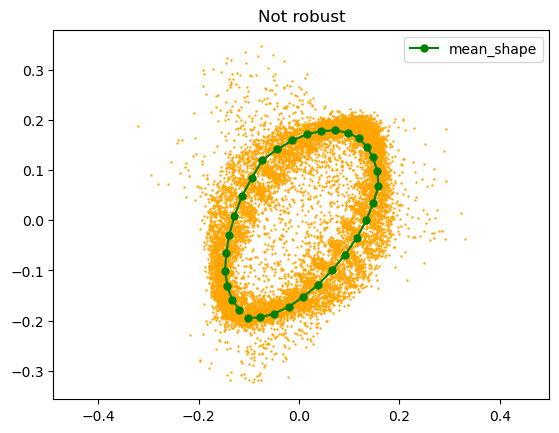

In [171]:
def solve(data):
	mean = np.mean(data, axis=0)
	epochs = 100
	z_m = []
	for epoch in range(epochs):
		z_m = find_transform(data, mean)
		mean = np.mean(z_m, axis=0)
	return mean, z_m

mean_prime, z_m_prime = solve(data)

for z in z_m_prime:
    plt.scatter(z[:, 0], z[:, 1], color='orange', s=0.5)

plt.plot(mean_prime[:, 0], mean_prime[:, 1], color='green', marker=".", ms=10, label="mean_shape")

plt.legend()
plt.axis('equal')
plt.title("Not robust")
plt.show()

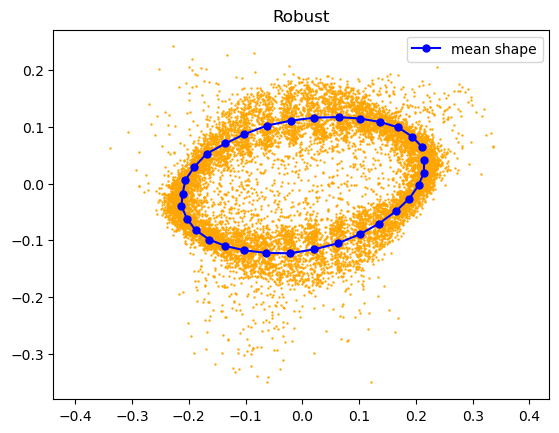

In [173]:
def solve_robust(data):
    mean = np.median(data, axis=0)
    epochs = 100
    z_m = []
    for epoch in range(epochs):
        z_m = find_transform(data, mean)
        mean = np.median(z_m, axis=0)
    return mean, z_m


mean, z_m = solve_robust(data)

for z in z_m:
    plt.scatter(z[:, 0], z[:, 1], color='orange', s=0.5)

     
plt.plot(mean[:, 0], mean[:, 1], color='blue', marker=".", ms=10, label="mean shape")

plt.legend()
plt.axis('equal')
plt.title("Robust")
plt.show()

In [168]:
data.shape

(357, 32, 2)